In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("../datasets/MNIST(Ass2&3)/mnist_train.csv")
test_data = pd.read_csv("../datasets/MNIST(Ass2&3)/mnist_test.csv")

In [3]:
x_train = train_data.drop("label",axis=1)
x_test = test_data.drop("label",axis=1)
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = train_data["label"]
y_test = test_data["label"]

In [5]:
x_train = x_train.astype('float64') / 255.0
x_test = x_test.astype('float64') / 255.0

In [6]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [9]:
model = Sequential([
    Dense(128, activation="sigmoid", input_shape=(784,)),
    Dense(64, activation="sigmoid"),
    Dense(10, activation="softmax")
])

c:\Users\dsb71\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7652 - loss: 1.0641 - val_accuracy: 0.7857 - val_loss: 0.9763
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7792 - loss: 0.9703 - val_accuracy: 0.8011 - val_loss: 0.8931
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7963 - loss: 0.8917 - val_accuracy: 0.8130 - val_loss: 0.8231
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8071 - loss: 0.8276 - val_accuracy: 0.8237 - val_loss: 0.7644
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8190 - loss: 0.7689 - val_accuracy: 0.8304 - val_loss: 0.7143
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.7225 - val_accuracy: 0.8406 - val_loss: 0.6716
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8368 - loss: 0.6761 - val_accuracy: 0.8451 - val_loss: 0.6350
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.6432 - val_accuracy: 0.

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8441 - loss: 0.6032
0.5523819327354431 0.8632000088691711


In [37]:
predictions = model.predict(x_test)
image_index = 86
print(np.argmax(y_test[image_index]))

print(np.argmax(predictions[image_index]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
7
7


<Axes: >

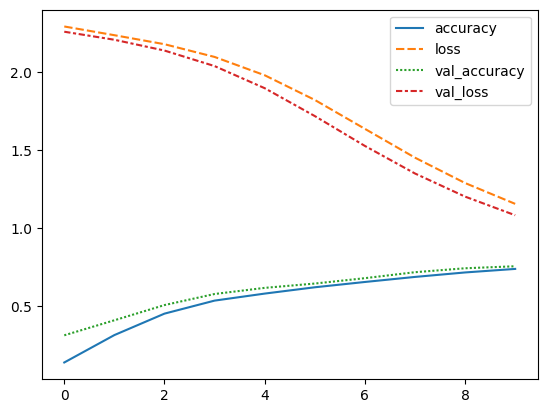

In [46]:
sns.lineplot(H.history)

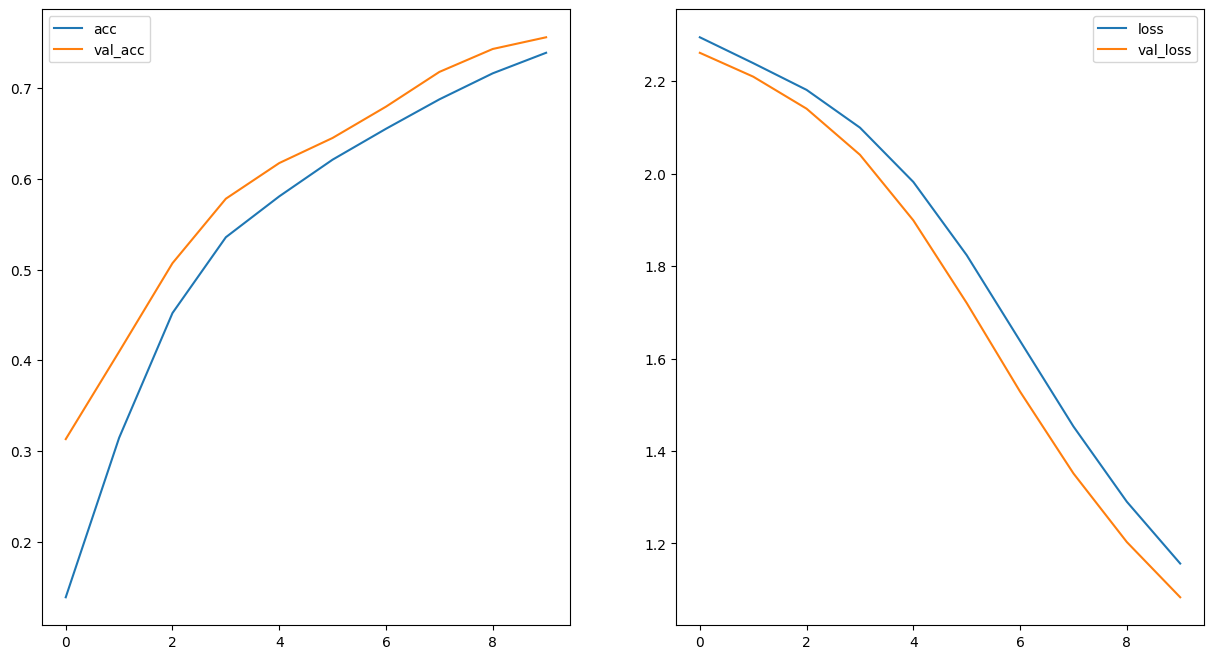

In [48]:
plt.figure(figsize=[15,8])

plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label="acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.legend()

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label="loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.legend()